In [3]:
library(pls)
library(elasticnet)
library(glmnet)
library(lubridate)
library(dplyr)
library(ggplot2) 
library(caret)

Warning message:
"package 'pls' was built under R version 3.6.3"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings

Warning message:
"package 'elasticnet' was built under R version 3.6.3"Loading required package: lars
Loaded lars 1.2

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.1

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: lattice

Attaching package: 'caret'

The following ob

***
TASK (1)
***

In [4]:
data_0<-read.csv("C:\\Users\\ch\\Desktop\\cuhk\\FTEC5580\\project\\data.csv", header = TRUE)
head(data_0,10)
data_1 = data_0[c(4:52)]
head(data_1,10)

TICKER,Month,VOL,RETC,RETN,sprtrn,SPREAD,OSC,CAPEI,bm,...,rd_sale,adv_sale,staff_sale,ptb,PEG_trailing,divyield,b_mkt,alpha,ivol,tvol
MSFT,200912,9238424,0.036382,-0.075459,0.017771,0.02,0.05971129,18.956,0.181,...,0.156,0.024,0,6.492,2.206,0.0171,1.2469,0.0137,0.0837,0.1001
MSFT,201001,13640561,-0.075459,0.022001,-0.036974,0.02,0.10361959,17.445,0.181,...,0.156,0.024,0,5.975,2.039,0.0185,1.2478,0.0134,0.0838,0.1001
MSFT,201002,10779015,0.022001,0.021538,0.028514,0.01,0.04356470,17.365,0.166,...,0.146,0.024,0,5.630,0.910,0.0181,1.2461,0.0133,0.0838,0.1001
MSFT,201003,11181446,0.021538,0.042595,0.058796,0.01,0.05292360,17.722,0.166,...,0.146,0.024,0,5.746,0.930,0.0178,1.2421,0.0138,0.0829,0.0994
MSFT,201004,13259805,0.042595,-0.150811,0.014759,0.01,0.07303095,18.480,0.166,...,0.146,0.024,0,5.992,0.970,0.0170,1.2386,0.0137,0.0829,0.0992
MSFT,201005,17259734,-0.150811,-0.108140,-0.081976,0.00,0.22674419,15.296,0.181,...,0.144,0.024,0,4.859,1.119,0.0202,1.2488,0.0133,0.0830,0.0998
MSFT,201006,16793127,-0.108140,0.121686,-0.053882,0.01,0.16731856,13.470,0.181,...,0.144,0.024,0,4.279,0.998,0.0226,1.2505,0.0136,0.0827,0.0996
MSFT,201007,14132280,0.121686,-0.085819,0.068778,0.02,0.11623402,15.109,0.181,...,0.144,0.024,0,4.799,1.120,0.0201,1.2638,0.0139,0.0825,0.0998
MSFT,201008,12827745,-0.085819,0.043682,-0.047449,0.01,0.12209674,13.071,0.233,...,0.139,0.026,0,4.376,0.699,0.0222,1.2672,0.0136,0.0825,0.1000
MSFT,201009,12779695,0.043682,0.088812,0.087551,0.01,0.06451613,13.498,0.233,...,0.139,0.026,0,4.519,0.730,0.0212,1.2547,0.0127,0.0821,0.0996


RETC,RETN,sprtrn,SPREAD,OSC,CAPEI,bm,pe_op_basic,pe_exi,ps,...,rd_sale,adv_sale,staff_sale,ptb,PEG_trailing,divyield,b_mkt,alpha,ivol,tvol
0.036382,-0.075459,0.017771,0.02,0.05971129,18.956,0.181,19.291,19.792,4.770,...,0.156,0.024,0,6.492,2.206,0.0171,1.2469,0.0137,0.0837,0.1001
-0.075459,0.022001,-0.036974,0.02,0.10361959,17.445,0.181,17.835,18.299,4.390,...,0.156,0.024,0,5.975,2.039,0.0185,1.2478,0.0134,0.0838,0.1001
0.022001,0.021538,0.028514,0.01,0.04356470,17.365,0.166,15.332,15.840,4.284,...,0.146,0.024,0,5.630,0.910,0.0181,1.2461,0.0133,0.0838,0.1001
0.021538,0.042595,0.058796,0.01,0.05292360,17.722,0.166,15.662,16.181,4.372,...,0.146,0.024,0,5.746,0.930,0.0178,1.2421,0.0138,0.0829,0.0994
0.042595,-0.150811,0.014759,0.01,0.07303095,18.480,0.166,16.329,16.870,4.560,...,0.146,0.024,0,5.992,0.970,0.0170,1.2386,0.0137,0.0829,0.0992
-0.150811,-0.108140,-0.081976,0.00,0.22674419,15.296,0.181,13.163,13.368,3.797,...,0.144,0.024,0,4.859,1.119,0.0202,1.2488,0.0133,0.0830,0.0998
-0.108140,0.121686,-0.053882,0.01,0.16731856,13.470,0.181,11.740,11.922,3.344,...,0.144,0.024,0,4.279,0.998,0.0226,1.2505,0.0136,0.0827,0.0996
0.121686,-0.085819,0.068778,0.02,0.11623402,15.109,0.181,13.168,13.373,3.751,...,0.144,0.024,0,4.799,1.120,0.0201,1.2638,0.0139,0.0825,0.0998
-0.085819,0.043682,-0.047449,0.01,0.12209674,13.071,0.233,11.016,11.174,3.250,...,0.139,0.026,0,4.376,0.699,0.0222,1.2672,0.0136,0.0825,0.1000
0.043682,0.088812,0.087551,0.01,0.06451613,13.498,0.233,11.498,11.662,3.356,...,0.139,0.026,0,4.519,0.730,0.0212,1.2547,0.0127,0.0821,0.0996


In [3]:
# OLS

reg_cv_0 <- lm(RETN ~ ., data = data_1) # Performing ordinary least squares (OLS) regression with all 49 covariates

summary(reg_cv_0)



Call:
lm(formula = RETN ~ ., data = data_1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.256303 -0.035596  0.002322  0.036600  0.258962 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.886e-02  1.651e-02  -1.142  0.25333    
RETC            -5.263e-02  2.032e-02  -2.590  0.00965 ** 
sprtrn          -1.331e-01  3.380e-02  -3.937 8.41e-05 ***
SPREAD           4.911e-02  4.141e-02   1.186  0.23577    
OSC              9.385e-04  7.477e-03   0.126  0.90012    
CAPEI           -1.121e-05  4.221e-06  -2.656  0.00795 ** 
bm               1.905e-02  6.938e-03   2.745  0.00608 ** 
pe_op_basic      5.452e-05  2.113e-05   2.580  0.00993 ** 
pe_exi          -1.143e-06  1.469e-05  -0.078  0.93797    
ps               1.201e-03  9.798e-04   1.226  0.22020    
pcf             -1.546e-04  9.591e-05  -1.612  0.10699    
dpr             -6.466e-04  6.145e-04  -1.052  0.29277    
npm             -5.310e-03  2.574e-02  -0.206  0.83656    


    We can see that the Multiple and Adjusted R-squared value are namely 0.03819 and 0.02519, indicating that the linear regression model does not provide a good fit.

In [4]:
# 10-fold cross-validation 
set.seed(123)  
  
# Defining training control 
train_control <- trainControl(method = "cv", 
                              number = 10) 

reg_cv_1 <- train(RETN ~ ., data = data_1,  
               method = "lm", 
               trControl = train_control) 

TestMSE_1 = as.numeric(reg_cv_1$results[2])^2  # Calculating the test MSE

print(reg_cv_1)
print(TestMSE_1)
summary(reg_cv_1)

## As is shown in the result, the test MSE estimated by 10-fold CV is 0.003600841

Linear Regression 

3600 samples
  48 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3240, 3240, 3240, 3240, 3240, 3240, ... 
Resampling results:

  RMSE        Rsquared    MAE       
  0.06000701  0.01913984  0.04606646

Tuning parameter 'intercept' was held constant at a value of TRUE
[1] 0.003600841



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.256303 -0.035596  0.002322  0.036600  0.258962 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.886e-02  1.651e-02  -1.142  0.25333    
RETC            -5.263e-02  2.032e-02  -2.590  0.00965 ** 
sprtrn          -1.331e-01  3.380e-02  -3.937 8.41e-05 ***
SPREAD           4.911e-02  4.141e-02   1.186  0.23577    
OSC              9.385e-04  7.477e-03   0.126  0.90012    
CAPEI           -1.121e-05  4.221e-06  -2.656  0.00795 ** 
bm               1.905e-02  6.938e-03   2.745  0.00608 ** 
pe_op_basic      5.452e-05  2.113e-05   2.580  0.00993 ** 
pe_exi          -1.143e-06  1.469e-05  -0.078  0.93797    
ps               1.201e-03  9.798e-04   1.226  0.22020    
pcf             -1.546e-04  9.591e-05  -1.612  0.10699    
dpr             -6.466e-04  6.145e-04  -1.052  0.29277    
npm             -5.310e-03  2.574e-02  -0.206  0.83656    

    As is shown in the result, the test MSE estimated by 10-fold CV is 0.003600841

***
TASK (2)
***

In [5]:
#LASSO

x=model.matrix(RETN ~ .,data_1)[,-1] # Create the X matrix for regression
y=data_1$RETN # Create the Y vector for regression
#grid =seq(0.007,0.0005, length =100) # Create a grid for lambda

#reg_lasso = glmnet (x,y,alpha =1,foldid = 10, lambda =grid)  # Regression with LASSO with 10-fold CV
reg_lasso = glmnet (x,y,alpha =1,foldid = 10)  # Regression with LASSO with 10-fold CV
reg_lasso$lambda[97] # Showing the value of lambda on the grid for the 80th one
print(reg_lasso)


lasso.pred=predict (reg_lasso, s=1, newx=x) # Obtain the predictions for new values of x and a particular lambda.
mean((y-lasso.pred)^2) # Calculate the MSE for a particular lambda 

## As is shown in the result, the test MSE estimated for LASSO by 10-fold CV is 0.003623251

[1] 8.479247e-07


Call:  glmnet(x = x, y = y, alpha = 1, foldid = 10) 

   Df %Dev    Lambda
1   0 0.00 0.0064140
2   1 0.19 0.0058440
3   1 0.35 0.0053250
4   1 0.49 0.0048520
5   1 0.60 0.0044210
6   1 0.69 0.0040280
7   2 0.77 0.0036700
8   2 0.85 0.0033440
9   2 0.91 0.0030470
10  2 0.97 0.0027770
11  5 1.08 0.0025300
12  5 1.21 0.0023050
13  6 1.32 0.0021000
14 10 1.53 0.0019140
15 10 1.73 0.0017440
16 10 1.89 0.0015890
17 10 2.03 0.0014480
18 12 2.15 0.0013190
19 14 2.26 0.0012020
20 14 2.36 0.0010950
21 14 2.44 0.0009978
22 14 2.51 0.0009092
23 18 2.57 0.0008284
24 19 2.64 0.0007548
25 23 2.71 0.0006878
26 24 2.79 0.0006267
27 25 2.87 0.0005710
28 26 2.93 0.0005203
29 27 2.99 0.0004741
30 29 3.05 0.0004319
31 31 3.10 0.0003936
32 34 3.16 0.0003586
33 34 3.22 0.0003268
34 34 3.26 0.0002977
35 33 3.30 0.0002713
36 34 3.33 0.0002472
37 35 3.36 0.0002252
38 36 3.38 0.0002052
39 37 3.40 0.0001870
40 38 3.43 0.0001704
41 38 3.47 0.0001552
42 39 3.50 0.0001414
43 39 3.52 0.0001289
44 41 3.54 0.0001174


[1] 0.003623251

    As is shown in the result, the test MSE estimated for LASSO by 10-fold CV is 0.003623251

In [13]:
dim(coef(reg_lasso))
coef(reg_lasso)[,97]
# Use predict() function
# Obtain the coefficient estimates for a particular lambda
# s is the penalty parameter value
predict(reg_lasso, s=0.001, type ="coefficients")[1:49,]

[1] 49 97

(Intercept)            RETC          sprtrn          SPREAD             OSC 
  -2.010830e-02   -5.256091e-02   -1.328743e-01    4.790213e-02    9.326396e-04 
          CAPEI              bm     pe_op_basic          pe_exi              ps 
  -1.120681e-05    1.871405e-02    5.439408e-05   -1.135638e-06    1.214234e-03 
            pcf             dpr             npm           opmad             roa 
  -1.529228e-04   -6.465857e-04   -5.902454e-03   -4.424601e-03    2.631287e-02 
            roe          efftax  totdebt_invcap   capital_ratio     int_totdebt 
  -5.700547e-03   -1.139692e-03   -3.355987e-02    4.173889e-02    3.825901e-03 
        cash_lt        invt_act        rect_act     debt_ebitda      short_debt 
  -1.330486e-02   -5.038346e-02   -1.178200e-02    2.023646e-04    5.251121e-04 
        ocf_lct       cash_debt         fcf_ocf        de_ratio    intcov_ratio 
  -1.622601e-02    2.113879e-02    1.550568e-02   -9.095322e-06   -6.612085e-06 
     cash_ratio     quick_ratio      curr_ratio cash_conversion        inv_turn 
   1.332671e-02   -3.616894e-02    2.622932e-02    6.806963e-06    8.427030e-05 
        at_turn     sale_invcap     sale_equity        sale_nwc         rd_sale 
   1.239834e-03    3.625775e-03   -4.660777e-05   -1.727071e-05   -2.082309e-02 
       adv_sale      staff_sale             ptb    PEG_trailing        divyield 
   9.327799e-02    1.090312e-02    1.230496e-04   -4.145530e-04    5.895081e-01 
          b_mkt           alpha            ivol            tvol 
   1.268481e-02   -5.749064e-01   -2.103105e-04    1.460349e-02

(Intercept)            RETC          sprtrn          SPREAD             OSC 
   5.307738e-05   -3.181074e-02   -1.228031e-01    0.000000e+00    0.000000e+00 
          CAPEI              bm     pe_op_basic          pe_exi              ps 
  -7.210007e-06    0.000000e+00    2.648006e-05    0.000000e+00    0.000000e+00 
            pcf             dpr             npm           opmad             roa 
  -2.753547e-05    0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00 
            roe          efftax  totdebt_invcap   capital_ratio     int_totdebt 
   0.000000e+00    0.000000e+00   -9.853285e-04    0.000000e+00    0.000000e+00 
        cash_lt        invt_act        rect_act     debt_ebitda      short_debt 
   0.000000e+00    0.000000e+00   -1.689342e-03    0.000000e+00    0.000000e+00 
        ocf_lct       cash_debt         fcf_ocf        de_ratio    intcov_ratio 
   0.000000e+00    0.000000e+00    7.347789e-03   -6.684138e-06   -3.529853e-06 
     cash_ratio     quick_ratio      curr_ratio cash_conversion        inv_turn 
   0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00 
        at_turn     sale_invcap     sale_equity        sale_nwc         rd_sale 
   0.000000e+00    1.508905e-04    0.000000e+00    0.000000e+00    0.000000e+00 
       adv_sale      staff_sale             ptb    PEG_trailing        divyield 
   0.000000e+00    0.000000e+00    0.000000e+00   -2.008095e-04    1.929993e-01 
          b_mkt           alpha            ivol            tvol 
   0.000000e+00    0.000000e+00    9.253986e-02    0.000000e+00

Data: 	X dimension: 3600 48 
	Y dimension: 3600 1
Fit method: kernelpls
Number of components considered: 48

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV         0.06021  0.06014  0.05996  0.05991  0.05996  0.05999  0.06001
adjCV      0.06021  0.06009  0.05993  0.05988  0.05992  0.05995  0.05996
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV     0.06001  0.06002  0.06005   0.06005   0.06006   0.06006   0.06007
adjCV  0.05996  0.05997  0.06000   0.06000   0.06001   0.06000   0.06002
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV      0.06005   0.06006   0.06004   0.06003   0.06000   0.06000   0.06000
adjCV   0.06000   0.06000   0.05999   0.05998   0.05995   0.05995   0.05995
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV      0.06001   0.06002   0.06004   0.06006   0.06008   0.06008   0.06006
adjCV   0.059


Loadings:
                Comp 1 Comp 2 Comp 3 Comp 4 Comp 5 Comp 6 Comp 7 Comp 8 Comp 9
RETC            -0.424 -0.164         0.221  0.253 -0.127 -0.190              
sprtrn          -0.476 -0.171         0.159  0.189 -0.149 -0.201         0.232
SPREAD           0.125                             -0.237                0.126
OSC              0.104                                                  -0.105
CAPEI           -0.126                              0.193  0.230 -0.103 -0.109
bm              -0.118  0.156  0.108 -0.314  0.231  0.110 -0.196         0.209
pe_op_basic                    0.151  0.119        -0.102        -0.163       
pe_exi                                      -0.112 -0.121  0.118  0.174       
ps                     -0.224  0.313               -0.143  0.238  0.159 -0.300
pcf                    -0.115         0.105                0.119  0.185 -0.451
dpr                                                              -0.170  0.125
npm                    -0.233  0.358 -0.1

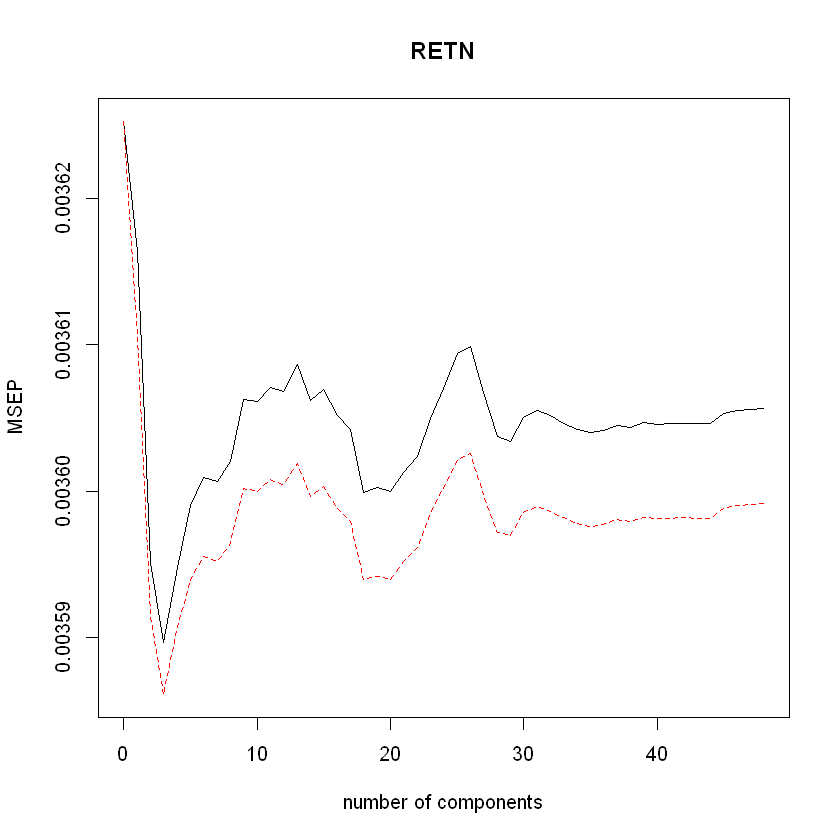

In [24]:
#PLS

# Setting scale=TRUE standardizes every variable. CV uses 10-fold CV. 
pls.fit=plsr(RETN ~., data=data_1, scale=TRUE, validation="CV")
summary(pls.fit)

# Note that plsr() reports the root mean squared error; in order to obtain the usual MSE, we must square this quantity.
# Plotting the cross-validation results 
validationplot(pls.fit,val.type="MSEP")
# Use predict() to obtain fitted values or predicted values for new observations. The argument ncomp specifies the number of principal components to use. 
pls.fitted=predict (pls.fit , ncomp =3) # or pls.fit$fitted.values
pls.predict=predict (pls.fit, newdata= data_1, ncomp=3) # you need to input a dataset for newdata. 
pls.scores=predict (pls.fit, type="scores", comp=c(1,3,5))  # or pls.fit$scores[,c(1,3,5)]
# Show the values for the 1st, 3rd and 5th components. 
pls.fit$loadings
# Show the loadings ($\phi_{jm}$) for each Z_m. Ignore the SS loadings part. 

## From both summary and plot, we can see that with 3 components, the model has the lowest MSE, which is 0.05991^2 = 0.003589


In [10]:
pls.fit_fin = plsr(RETN ~., data=data_1, ncomp=3, scale=TRUE, validation="CV")
summary(pls.fit_fin)

Data: 	X dimension: 3600 48 
	Y dimension: 3600 1
Fit method: kernelpls
Number of components considered: 3

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps
CV         0.06021  0.06016  0.05999  0.05996
adjCV      0.06021  0.06011  0.05996  0.05993

TRAINING: % variance explained
      1 comps  2 comps  3 comps
X       5.691   16.618   23.760
RETN    2.280    2.851    3.118


In [1]:
library(tree)
library(gbm)

Warning message:
"package 'tree' was built under R version 3.6.3"Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.8


gbm(formula = RETN ~ ., distribution = "gaussian", data = data_1, 
    n.trees = 500, interaction.depth = 1, shrinkage = 0.1, cv.folds = 10)
A gradient boosted model with gaussian loss function.
500 iterations were performed.
The best cross-validation iteration was 488.
There were 48 predictors of which 46 had non-zero influence.

,var,rel.inf
sprtrn,sprtrn,17.2706399
ptb,ptb,7.0860047
RETC,RETC,5.1147877
pcf,pcf,4.5000476
b_mkt,b_mkt,3.9791631
OSC,OSC,3.7425098
bm,bm,3.4964870
CAPEI,CAPEI,3.1523084
fcf_ocf,fcf_ocf,2.9109187
alpha,alpha,2.9104118


[1] 0.003014143

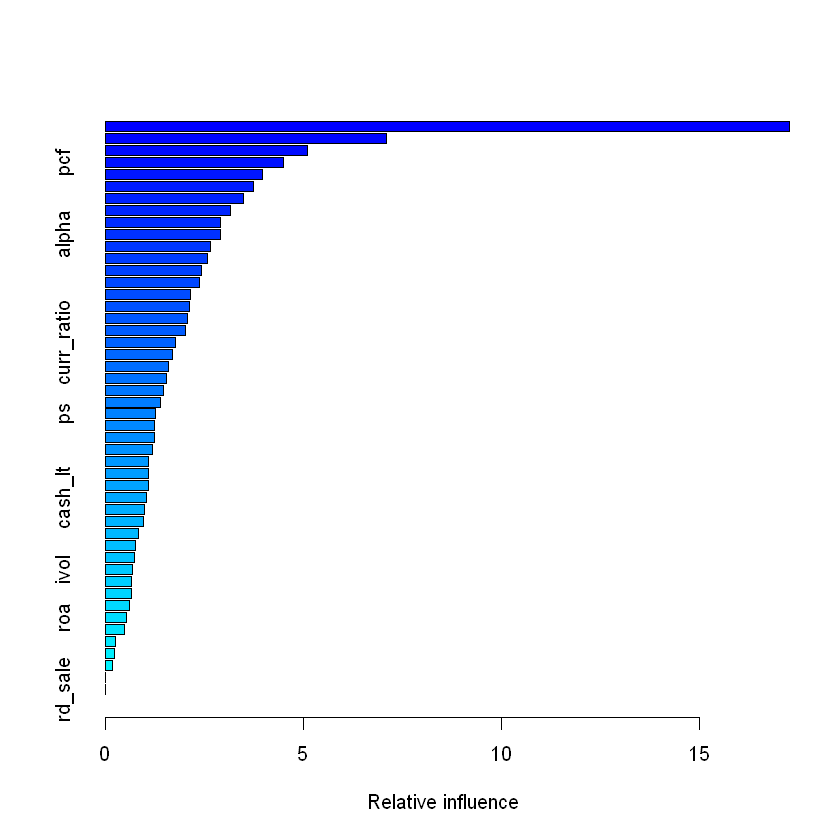

In [5]:
set.seed(1)
bst.default = gbm(RETN~., data = data_1, distribution = "gaussian", n.trees = 500, interaction.depth = 1, shrinkage = 0.1, cv.folds = 10)
bst.predict = predict(bst.default,data_1, n.trees = 488)
bst.default
summary(bst.default)
bst.testMSE = mean((data_1$RETN-bst.predict)^2)
bst.testMSE

# According to the output, the tset MSE of the boost trees model using 10-fold CV is 0.00301414

    Test MSE (10-fold CV) for:
        OLS: 0.003600841
        LASSO: 0.003623251
        PLS: 0.003589
        Boost trees: 0.00301414
        
    Therefore, PLS and Boost trees has improvements over OLS, while LASSO is even worse.

***
TASK (3)
***

    As illutsrated in the OLS regression, the Monthly Return of S&P Composite Index (sprtrn), the Dividend Yield (divyiled) are the two most significant variates with p-value < 0.001
    
    The Shillers cyclically Adjusted P/E ratio (CAPEI), Book/Market ratio(bm), Price/Operating Earnings (Basic) (pe_op_basic), and Free Cash Flow/Operating Cash Flow (fcf/ocf) are also significant variates with p-value < 0.01 
    
    The Total Debt/Invested Capital  (totdebt_invcap), the Capitalization Ratio (capital_ratio), the Inventory/Current Assets (invt_act), the Operating CF/Current Liabilities (ocf/lct), the Total Debt/Equity (de_ratio), the Current Ratio (curr_ratio), the Trailing P/E to Growth (PEG) ratio (PEG_trailing) are significant variates with p-value < 0.1
    
    According to LASSO regression, the significant covirates under s = 0.001 are: RETC, sprtn, CAPEI, pe_op_basic, pcf, totdebt_invcap, rect_act, fcf_ocf, de_ratio, intcov_ratio, sale_invcap, PEG_trailing, divyield and ivol.
    
    According to boost trees, which has the lowest test MSE, the top 10 variates with highest relative influences are namely:
    sprtrn, ptb, RETC, pcf, b_mkt, OSC, bm, CAPEI, fcf_ocf and alpha


***
TASK (4)
***

    According to the output above, we can see that all the models has a high test-MSE. It indicates that these models have low ability of prediction. Therefore, it is hard to predict the next month return using given covarites. 
    The semi-strong form efficiency theory follows the belief that because all information that is public is used in the calculation of a stock's current price, investors cannot utilize either technical or fundamental analysis to gain higher returns in the market.
    Based on the conclusion above, it is hard to predict the return of next month, which means that investors cannot utilize technical analysis for prediction to get ultimate return. It shows that the semi-strong form efficiency theory works for the given stock market.